In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import itertools
%matplotlib widget

## Band Structure of Mono and Bilayer Graphene

If you have questions about this notebook, e-mail Oleg Malanyuk (oleg.malanyuk@epfl.ch) 

The purpose of this notebook is to investigate the band model of Mono and Bilayer graphene modeled with tight binding model. 

## Tight binding model for monolayer graphene

Monolayer graphene is a sheet of carbons aranged in a hexagonal lattice. For convinicence, we split the lattice into sub-lattices of the two inequivalent carbon atoms A and B. If only nearest neightbour interactions are considered, the Hamiltonian matrix will have the form:

$$H = \begin{pmatrix}
H_{AA} & H_{AB}\\
H_{BA} & H_{BB}
\end{pmatrix}$$

Where $H_{AA}$ is the sum of on-site energies for the A sublattice:
$$H_{AA} = \frac{1}{N}\sum_{i=1}^{N}<\phi_A(r-R_{A,i})|\mathcal{H}|\phi_A(r-R_{A,i})> = \epsilon_A$$
Similarly, $H_{BB} = \epsilon_B$

$H_{AB}$ is hopping integral for A sublattice, with each A atom having 3 nearest neigbour B atoms:
$$H_{AB} = \frac{1}{N}\sum_{i=1}^{N}\sum_{l=1}^{3}e^{ik\cdot\delta_l}<\phi_A(r-R_{A,i})|\mathcal{H}|\phi_B(r-R_{A,i}-\delta_l)>$$
$$\delta_1 = (0,a/\sqrt3),\delta_2 = (a/2,-a/2\sqrt3),\delta_3 = (-a/2,-a/2\sqrt3)$$

In this notation, there are N atoms in each sublattice, a is the lattice parameter, $R_{A,i}$ is the position of the i-th atom in the sublattice, and $\phi_A$ and $\phi_B$ are the orbital wavefunction for atoms in the A and B sublattices. For monolayer graphene, $\epsilon_B = \epsilon_B$

If one defines hopping parameter $\gamma_0 = -<\phi_A(r-R_{A,i})|\mathcal{H}|\phi_B(r-R_{A,i}-\delta_l)>$ which is the same for each atom i and neighbouring atom l, then the off-diagonal matrix element $H_{AB}$ can be written as:
$$H_{AB} = -\gamma_0\sum_{l=1}^{3}e^{ik\cdot\delta_l} = -\gamma_0 \left(e^{ik_ya/\sqrt3}+2e^{ik_ya/2\sqrt3}cos(k_xa/2)\right) = -\gamma_0 f(x)$$

Hence 

$$H = \begin{pmatrix}
\epsilon_A & -\gamma_0 f(x)\\
-\gamma_0 f(x)^{*} & \epsilon_A
\end{pmatrix}$$

The notebook below is used to solve the tight binding problem $H\psi_j=E_jS\psi_j$. Note that the overlap matix $S$ will be assumed to be identity.

In [18]:
## We start by defining function f(k) used in the Hamiltonian matrix
def f(k):
    f = np.exp(1j*k[1]*2*np.pi/np.sqrt(3)) + 2*np.exp(-1j*k[1]*2*np.pi/np.sqrt(3)/2)*np.cos(k[0]*2*np.pi/2)
    return f

In [2]:
##We then set up constants and variables to be used
n = 61 #Discritization of the kx and ky axis
kx = np.linspace(-1,1, n,endpoint=True)
ky = np.linspace(-1,1, n,endpoint=True) #Defining kx and ky
k = np.array(list(itertools.product(kx,ky)))
k = np.round(k,10) #Defining the meshgrid
E = np.zeros(k.shape) #Prealocating Energy vector. There are two sublattices hence there will be two bands

k_bril = np.array([[2/3,0],[1/3,1/np.sqrt(3)],[-1/3,1/np.sqrt(3)],[-2/3,0],[-1/3,-1/np.sqrt(3)],[1/3,-1/np.sqrt(3)],[2/3,0]])
brill_zone = np.zeros(7) #Defining the Brillouin zone for the plot

eps_0 = 0 
gamma_0 = 3.033 #setting parameters for esp_0=eps_A and gamma_0, taken from literature, both in eV


##For each value of k, solve the eigenvalue problem and record the results in the energy vector
for i in range(k.shape[0]):
    
    H = np.array([[eps_0, -gamma_0*f(k[i])],[-gamma_0*np.conjugate(f(k[i])),eps_0]])
    E[i], v = np.linalg.eigh(H)

After solving the eigenvalue problem, we can plot dispersion curves

<function matplotlib.pyplot.show(close=None, block=None)>

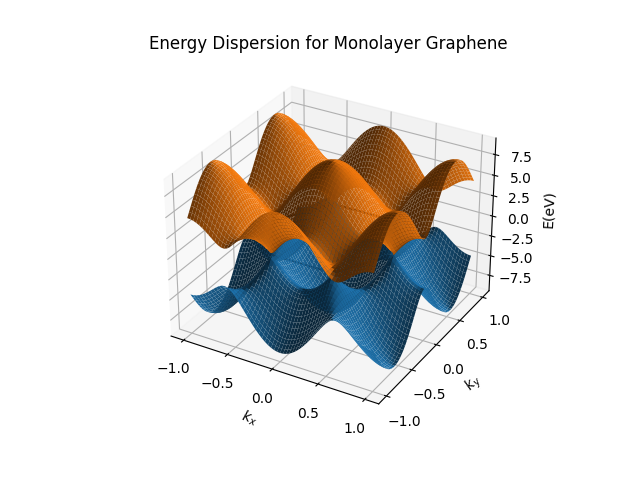

In [3]:
##Next, we set up the 3D plot of energy dispersion

figs = plt.figure();

ax = plt.subplot(1,1,(1,1), projection='3d') #define the plot


E_minus = E[:,0].reshape(n,n) #reshape the energy vectors into a grid
E_plus = E[:,1].reshape(n,n)

ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_minus, rstride=1, cstride=1);
ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_plus, rstride=1, cstride=1); #plot the energy two bands

ax.plot3D(k_bril[:,0], k_bril[:,1], brill_zone, color='k'); #plot the Brillouin zone

ax.set_xlabel('$k_x$');
ax.set_ylabel('$k_y$');
ax.set_zlabel('E(eV)');
ax.set_title("Energy Dispersion for Monolayer Graphene") #graph formating

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

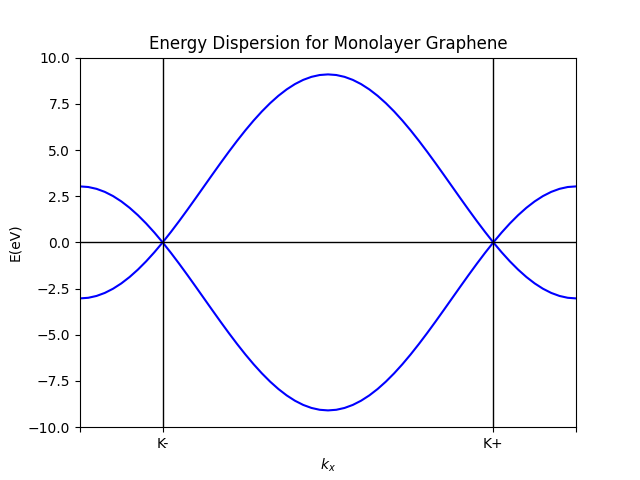

In [4]:
#Next, we plot the energy disperison with respect to kx, setting ky=0

figs = plt.figure();
ax1 = plt.subplot(1,1,(1,1));

#selecting the relevant data
k_plot = k[np.where(k[:,1]==0)[0],0]
plot = plt.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],1], color="b")
plot = plt.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],0], color="b")

#graph formating
plot = ax1.axvline(x = -2/3, color = 'k', label = 'K-', linewidth=1)
plot = ax1.axvline(x = 2/3, color = 'k', label = 'K+', linewidth=1)
plot = ax1.axhline(y = 0, color = 'k', label = '0', linewidth=1)
ax1.set_xticks((k_plot[0],-2/3,2/3,k_plot[-1]))
ax1.set_xticklabels(("","K-","K+",""))
ax1.set_xlim(k_plot[0],k_plot[-1])
ax1.set_xlabel('$k_x$');
ax1.set_ylabel('E(eV)');
ax1.set_title("Energy Dispersion for Monolayer Graphene (ky=0)")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

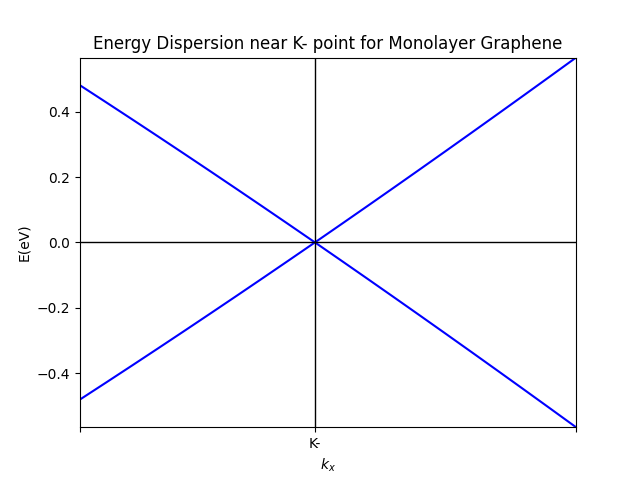

In [5]:
#To investigate the energy dispersion close to K- point, we repeat the process with more fine mesh grid

n = 201
kx = np.linspace(-1,-1/3, n,endpoint=True)
ky = [0]
k = np.array(list(itertools.product(kx,ky)))
k = np.round(k,10)
E = np.zeros((k.shape[0],2))
eps_0 = 0
gamma_0 = 3.033


for i in range(k.shape[0]):
    
    H = np.array([[eps_0, -gamma_0*f(k[i])],[-gamma_0*np.conjugate(f(k[i])),eps_0]])
    E[i], v = np.linalg.eigh(H)

figs = plt.figure();
ax1 = plt.subplot(1,1,(1,1));
plot_range=np.where(k[:,1]==0)[0]
k_center = np.where(k[plot_range,0]>-2/3)[0][0]
k_plot = k[plot_range,0]
k_plot = k_plot[k_center-10:k_center+10]
E_plot = E[plot_range]
E_plot = E_plot[k_center-10:k_center+10]
plot = ax1.plot(k_plot,E_plot[:,0],color="b")
plot = ax1.plot(k_plot,E_plot[:,1],color="b")

ax1.set_ylim(min(E_plot[:,0]),max(E_plot[:,1]))
ax1.set_xlim(k_plot[0],k_plot[-1])
plot = ax1.axvline(x = -2/3, color = 'k', label = 'K-', linewidth=1)
plot = ax1.axhline(y = 0, color = 'k', label = '0', linewidth=1)
ax1.set_xticks((k_plot[0],-2/3,k_plot[-1]))
ax1.set_xticklabels(("","K-",""))
ax1.set_xlabel('$k_x$');
ax1.set_ylabel('E(eV)');
ax1.set_title("Energy Dispersion near K- point for Monolayer Graphene")
plt.show

As can be seen, at the verticies of the Brillouin zone the energy dispersion is linear. 

## Tight binding model for binolayer graphene

The process can be repeated for bilayer graphene. However, now there will be 4 sublattices A1, B1, A2, B2, 2 for each layer. One also needs to define aditional parameters $\gamma_1$ (hopping between A2 and B1 sublattice), $\gamma_3$ (hopping between A1 and B2 sublattice) and $\gamma_4$ (hopping between A1 and A2 sublattice, or B1 and B2) For annotated diagram, refer to the paper "The electronic properties of bilayer graphene" by Edward McCann and Mikito Koshino, DOI = 10.1088/0034-4885/76/5/056503

The on-site energies of the 4 sublattices are also no longer equivalent, with $\epsilon_{B1} = \epsilon_{A2} =/= \epsilon_{A1} = \epsilon_{B2}$

The Hamiltonian takes the form

$$H = \begin{pmatrix}
\epsilon_{A1} & -\gamma_0f(x) & \gamma_4f(x) & -\gamma_3f^{*}(x)\\
-\gamma_0f^{*}(x) & \epsilon_{B1} & \gamma_1 & \gamma_4 f(x)\\
\gamma_4f^{*}(x) & \gamma_1 & \epsilon_{A2} & -\gamma_0 f(x)\\
-\gamma_3f(x) & \gamma_4f^{*}(x) & -\gamma_0f^{*}(x) & \epsilon_{B2}
\end{pmatrix}$$

The notebook below is used to solve the tight binding problem $H\psi_j=E_jS\psi_j$. Again $S$ will be assumed to be identity.

In [13]:
#The notebook below is mostly the repeat of previous steps, with only difference being the Hamiltonian matrix and presence of 4 bands instead of 2
n = 61
kx = np.linspace(-1,1, n,endpoint=True)
ky = np.linspace(-1,1, n,endpoint=True)
k = np.array(list(itertools.product(kx,ky)))
k = np.round(k,10)
E = np.zeros((k.shape[0],4))
eps_0 = 0
eps_1 = 0.022
gamma_0 = 3.16
gamma_1 = 0.381
gamma_3 = 0.38
gamma_4 = 0.14 #literature value of constants in Hamiltonian, all in eV

for i in range(k.shape[0]):
    
    H = np.array([[eps_0/2, -gamma_0*f(k[i]), gamma_4*f(k[i]), -gamma_3*np.conjugate(f(k[i]))],
                  [0, eps_1/2, gamma_1, gamma_4*f(k[i])],
                  [0, 0, eps_1/2, -gamma_0*f(k[i])],
                  [0, 0, 0, eps_0/2]])
    H = H + H.conj().T #to simplify writing the matrix, we first define the upper triangular part (halfing the values on the diagonal), and then add hermitian conjugate
    E[i], v = np.linalg.eigh(H)


<function matplotlib.pyplot.show(close=None, block=None)>

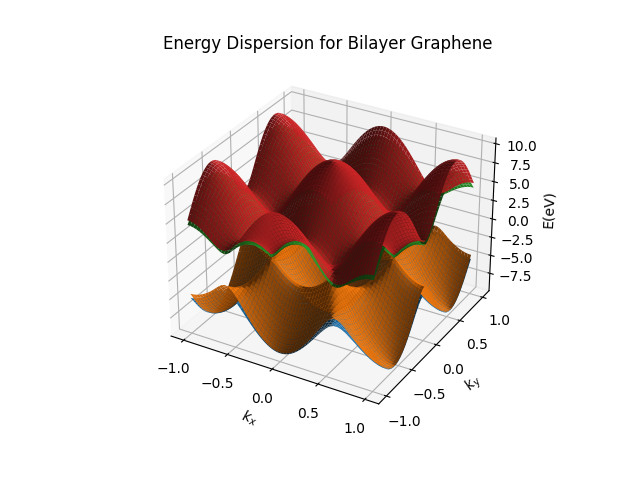

In [14]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
E_minus2 = E[:,0].reshape(n,n)
E_minus1 = E[:,1].reshape(n,n)
E_plus1 = E[:,2].reshape(n,n)
E_plus2 = E[:,3].reshape(n,n)
ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_minus2, rstride=1, cstride=1);
ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_minus1, rstride=1, cstride=1);
ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_plus1, rstride=1, cstride=1);
ax.plot_surface(k[:,0].reshape(n,n), k[:,1].reshape(n,n), E_plus2, rstride=1, cstride=1);
ax.plot3D(k_bril[:,0], k_bril[:,1], brill_zone, color='k');
ax.set_xlabel('$k_x$');
ax.set_ylabel('$k_y$');
ax.set_zlabel('E(eV)');
ax.set_title("Energy Dispersion for Bilayer Graphene")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

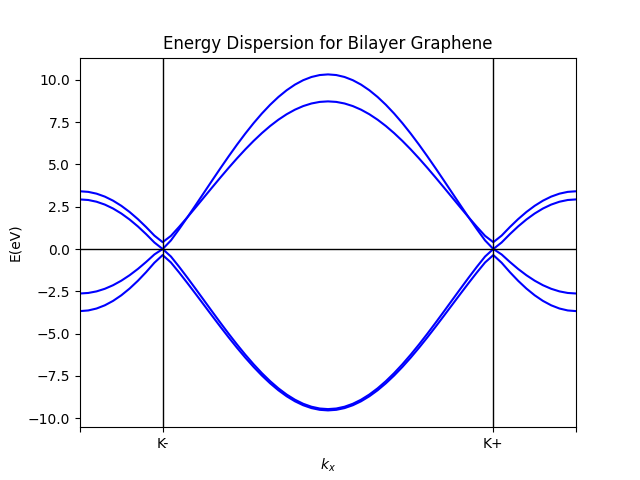

In [16]:
figs = plt.figure();
ax1 = plt.subplot(1,1,(1,1));
k_plot=k[np.where(k[:,1]==0)[0],0]
plot = ax1.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],0],color="b")
plot = ax1.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],1],color="b")
plot = ax1.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],2],color="b")
plot = ax1.plot(k[np.where(k[:,1]==0)[0],0],E[np.where(k[:,1]==0)[0],3],color="b")
plot = ax1.axvline(x = -2/3, color = 'k', label = 'K-', linewidth=1)
plot = ax1.axvline(x = 2/3, color = 'k', label = 'K+', linewidth=1)
plot = ax1.axhline(y = 0, color = 'k', label = '0', linewidth=1)
ax1.set_xticks((k_plot[0],-2/3,2/3,k_plot[-1]))
ax1.set_xticklabels(("","K-","K+",""))
ax1.set_xlim(k_plot[0],k_plot[-1])
ax1.set_xlabel('$k_x$');
ax1.set_ylabel('E(eV)');
ax1.set_title("Energy Dispersion for Bilayer Graphene")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

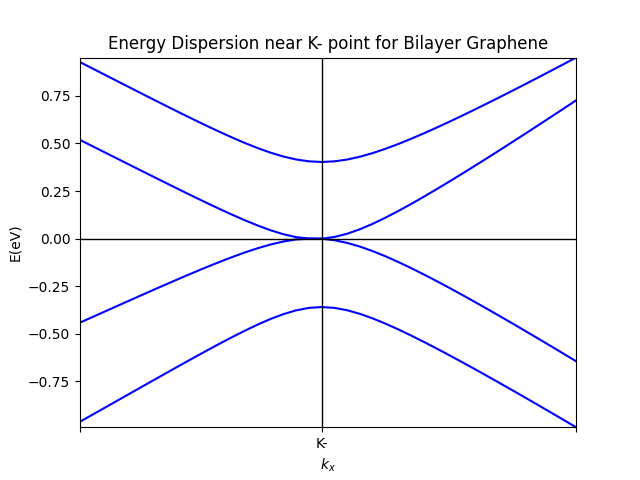

In [17]:
n = 301
kx = np.linspace(-1,-1/3, n,endpoint=True)
ky = [0]
k = np.array(list(itertools.product(kx,ky)))
k = np.round(k,10)
E = np.zeros((k.shape[0],4))
eps_0 = 0
eps_1 = 0.022
gamma_0 = 3.16
gamma_1 = 0.381
gamma_3 = 0.38
gamma_4 = 0.14

for i in range(k.shape[0]):
    
    H = np.array([[eps_0/2, -gamma_0*f(k[i]), gamma_4*f(k[i]), -gamma_3*np.conjugate(f(k[i]))],
                  [0, eps_1/2, gamma_1, gamma_4*f(k[i])],
                  [0, 0, eps_1/2, -gamma_0*f(k[i])],
                  [0, 0, 0, eps_0/2]])
    H = H + H.conj().T
    E[i], v = np.linalg.eigh(H)

figs = plt.figure();
ax1 = plt.subplot(1,1,(1,1));
plot_range=np.where(k[:,1]==0)[0]
k_center = np.where(k[plot_range,0]>-2/3)[0][0]
k_plot = k[plot_range,0]
k_plot = k_plot[k_center-20:k_center+20]
E_plot = E[plot_range]
E_plot = E_plot[k_center-20:k_center+20]
plot = ax1.plot(k_plot,E_plot[:,0],color="b")
plot = ax1.plot(k_plot,E_plot[:,1],color="b")
plot = ax1.plot(k_plot,E_plot[:,2],color="b")
plot = ax1.plot(k_plot,E_plot[:,3],color="b")
plot = ax1.axvline(x = -2/3, color = 'k', label = 'K-', linewidth=1)
plot = ax1.axhline(y = 0, color = 'k', label = '0', linewidth=1)
ax1.set_ylim(min(E_plot[:,0]),max(E_plot[:,3]))
ax1.set_xlim(k_plot[0],k_plot[-1])
ax1.set_xticks((k_plot[0],-2/3,k_plot[-1]))
ax1.set_xticklabels(("","K-",""))
ax1.set_xlabel('$k_x$');
ax1.set_ylabel('E(eV)');
ax1.set_title("Energy Dispersion near K- point for Bilayer Graphene")
plt.show

array([-0.70888889, -0.70666667, -0.70444444, -0.70222222, -0.7       ,
       -0.69777778, -0.69555556, -0.69333333, -0.69111111, -0.68888889,
       -0.68666667, -0.68444444, -0.68222222, -0.68      , -0.67777778,
       -0.67555556, -0.67333333, -0.67111111, -0.66888889, -0.66666667,
       -0.66444444, -0.66222222, -0.66      , -0.65777778, -0.65555556,
       -0.65333333, -0.65111111, -0.64888889, -0.64666667, -0.64444444,
       -0.64222222, -0.64      , -0.63777778, -0.63555556, -0.63333333,
       -0.63111111, -0.62888889, -0.62666667, -0.62444444, -0.62222222])